## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [2]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [152]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data

784594


In [206]:
# 找到換行符號，用該符號做字串分割後，把它拿掉

#dd = data.replace('\n', ',').replace('\t', ',').split(',')
#dd

import re
dfsplit = re.split('\s', data)
label = dfsplit[0:len(dfsplit):2]
link = dfsplit[1:len(dfsplit):2]
print(len(label))
print(len(link))
label.pop(1)
print(len(label))
print(len(link))

10005
10004
10004
10004


In [211]:
import pandas as pd
arrange_data = {'label': label, 'link': link}
df = pd.DataFrame(arrange_data)
df.head()

,label,link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_304,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_327,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_355,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_373,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

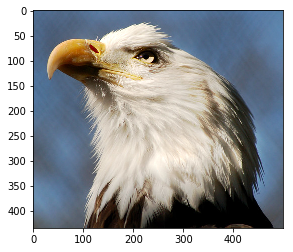

In [242]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, 'link']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [266]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for link in url_list:
        response = requests.get(link)
        try:
            img = Image.open(BytesIO(response.content))
        except:
            pass
        else:
            img_list.append(img)
    return img_list

Total images that we got: 4 


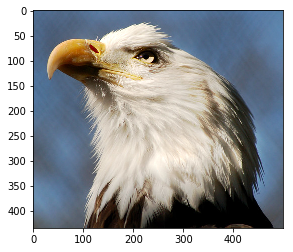

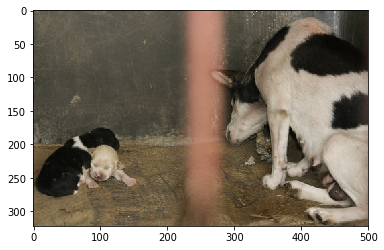

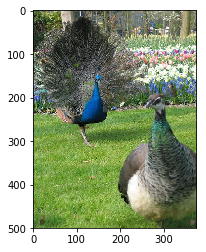

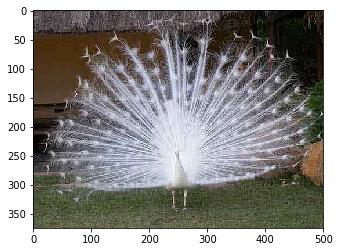

In [268]:
result = img2arr_fromURLs(df.iloc[0:5, 1])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()